## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.



In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from sklearn.datasets import make_circles

#5000 samples
num_samples= 1000
X, y = make_circles(num_samples,
                    noise=0.03,
                    random_state=42)

In [9]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [10]:
X_train = X[:800]
y_train =y[:800]
X_test = X[800:]
y_test = y[800:]

Define the model

In [11]:
tf.random.set_seed(888)

model_lr = tf.keras.models.Sequential([
    tf.keras.layers.Dense( 100, activation="relu"),
    tf.keras.layers.Dense( 10, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid" )
])

model_lr.compile( loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                  metrics = ["accuracy"])

model_lr.fit( X_train, y_train, epochs=20, verbose=0)
model_lr.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9950


[0.01486531738191843, 0.9950000047683716]

Define the **callback** for the best laerning rate

In [47]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))

model_lr_best = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

model_lr_best.compile( loss= tf.keras.losses.BinaryCrossentropy(),
                       optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics= ["accuracy"])

hystory_lr_best = model_lr_best.fit( X_train,
                     y_train,
                     callbacks=[lr_schedule],
                     epochs= 100,
                     verbose =0)


In [13]:
hystory_lr_best.history.keys()

dict_keys(['loss', 'accuracy', 'lr'])

Plot the  history values

<AxesSubplot: >

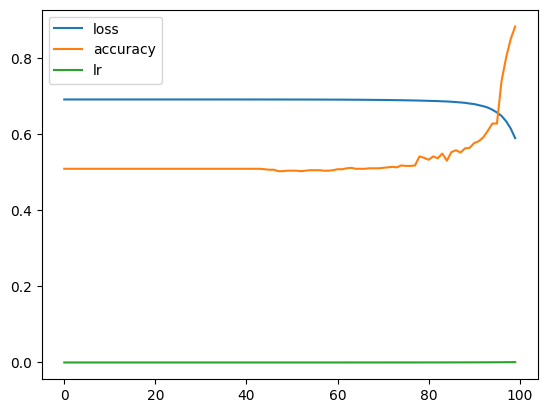

In [48]:
import pandas as pd
pd.DataFrame(hystory_lr_best.history).plot()

Can't see how it' performing

In [49]:
history_lr_best= model_lr_best.fit(X_train,
                  y_train,
                  callbacks=[lr_schedule],
                  epochs=150,
                  verbose=0)

<AxesSubplot: >

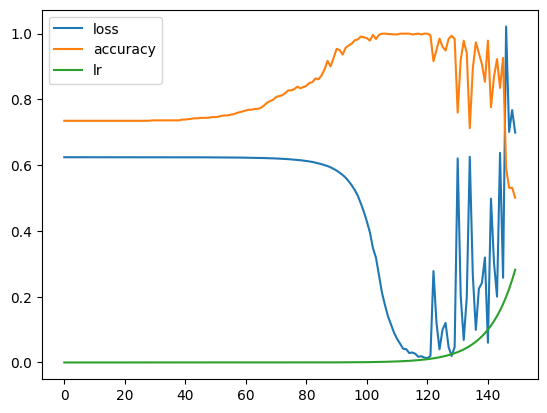

In [16]:
pd.DataFrame(history_lr_best.history).plot()

Isolate the loss curve

Text(0, 0.5, 'Loss')

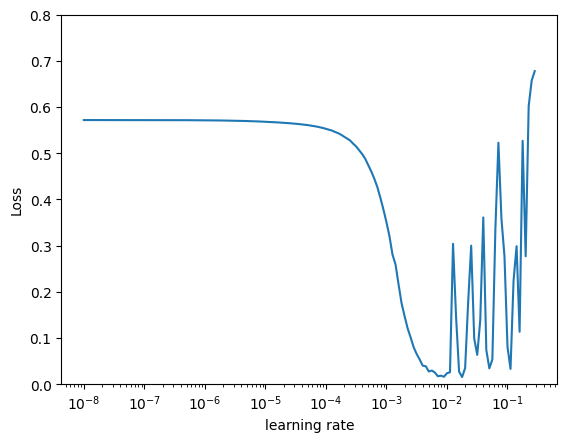

In [50]:
x_axis= [1e-8 * 10**(e/20) for e in range(150) ]
plt.semilogx(x_axis,history_lr_best.history.get("loss"))
plt.ylim(0, 0.8)
plt.xlabel("learning rate")
plt.ylabel("Loss")


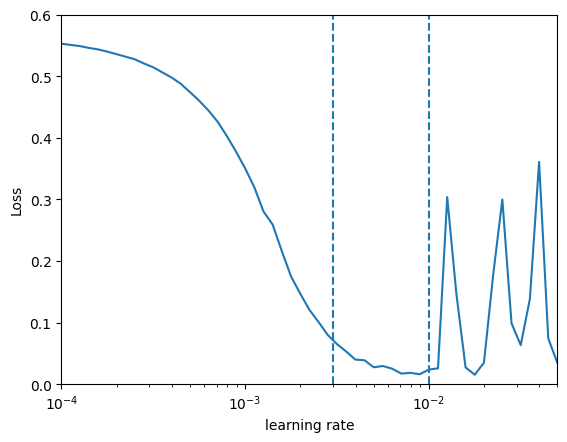

In [51]:
x_axis= [1e-8 * 10**(e/20) for e in range(150) ]
plt.semilogx(x_axis,history_lr_best.history.get("loss"))
plt.ylim(0, 0.6)
plt.xlim(1e-4, 5e-2)
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.axvline(0.003,linestyle= '--')
plt.axvline(0.01,linestyle= '--')


Let's try at 10-4, 10-3 and  10-2
Epochs 50

In [52]:
EPOCHS_TRAIN= 150
LR_A = 0.001
LR_B = 0.003
LR_C = 0.01


In [57]:
model_A = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])
model_A.compile( loss= tf.keras.losses.BinaryCrossentropy(),
                       optimizer= tf.keras.optimizers.Adam(learning_rate=LR_A),
                       metrics= ["accuracy"])
hystory_lr_A = model_A.fit( X_train,y_train, epochs= EPOCHS_TRAIN,verbose =0 )
model_A.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000


[0.006687069311738014, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


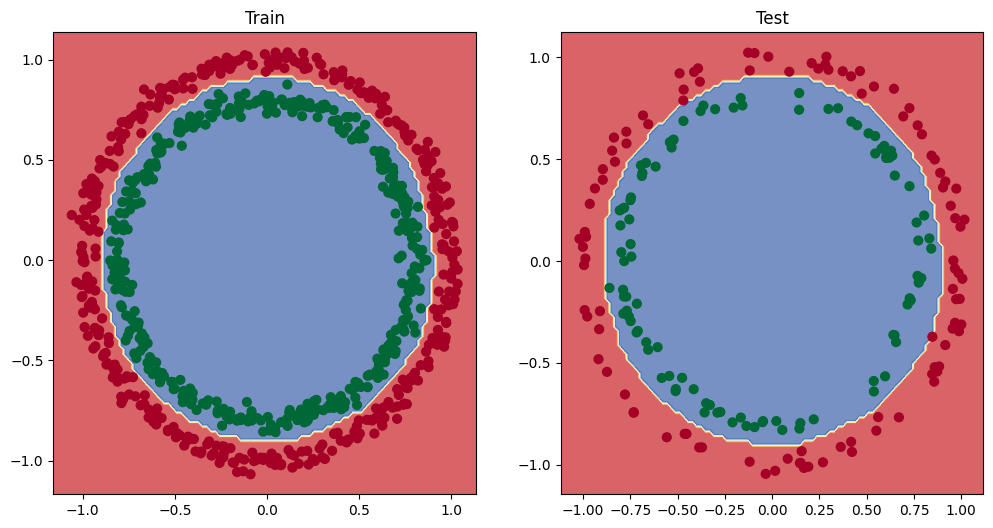

In [58]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_A, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_A, X=X_test, y=y_test)
plt.show()

In [59]:
model_B = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])
model_B.compile( loss= tf.keras.losses.BinaryCrossentropy(),
                       optimizer= tf.keras.optimizers.Adam(learning_rate=LR_B),
                       metrics= ["accuracy"])
hystory_lr_B = model_B.fit( X_train,y_train, epochs= EPOCHS_TRAIN,verbose =0 )
model_B.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000


[0.004380377475172281, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


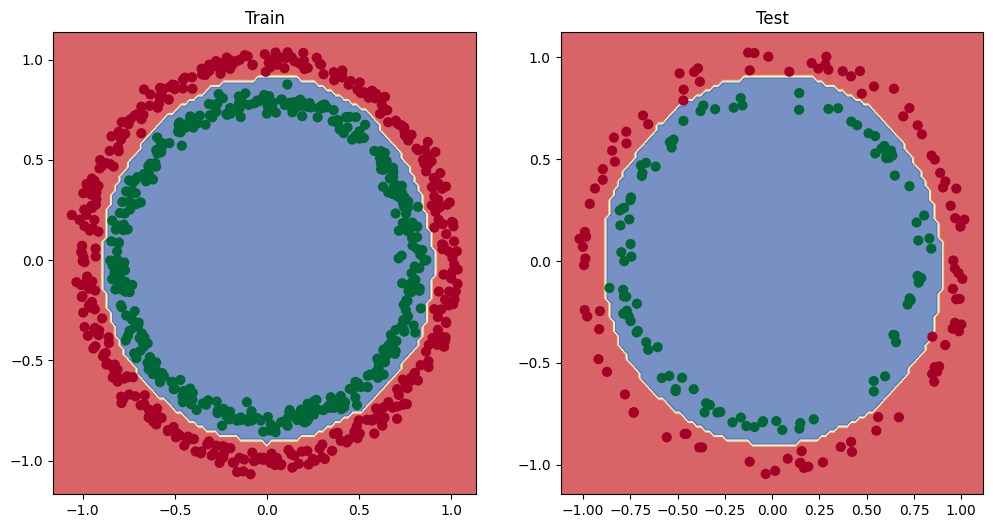

In [60]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_B, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_B, X=X_test, y=y_test)
plt.show()

In [62]:
model_C = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),

])
model_C.compile( loss= tf.keras.losses.BinaryCrossentropy(),
                       optimizer= tf.keras.optimizers.Adam(learning_rate=LR_C),
                       metrics= ["accuracy"])
hystory_lr_C = model_C.fit( X_train,y_train, epochs= EPOCHS_TRAIN,verbose =0)
model_C.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 1.0000


[0.005041235126554966, 1.0]

313/313 [==============================] - 0s 943us/step
doing binary classification
313/313 [==============================] - 0s 971us/step
doing binary classification


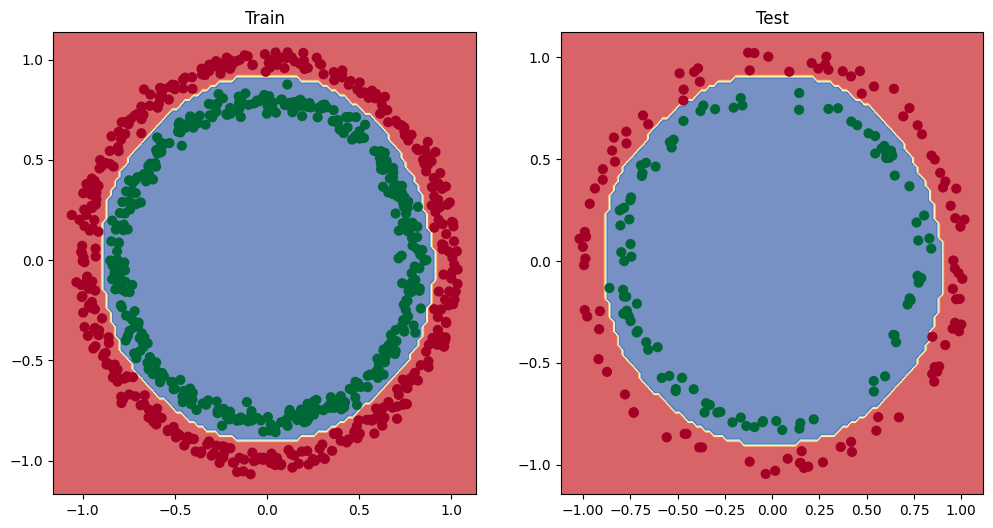

In [63]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_C, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_C, X=X_test, y=y_test)
plt.show()

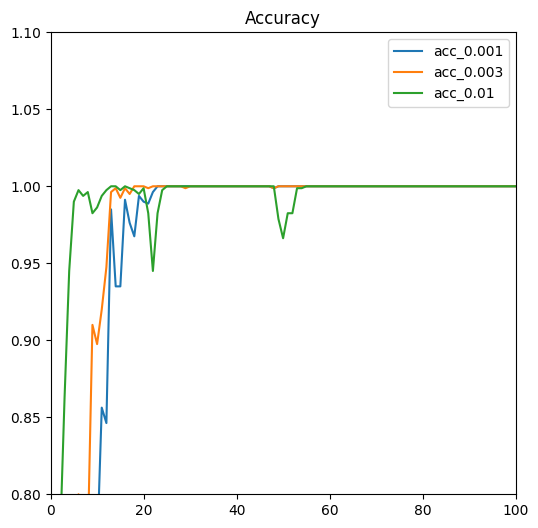

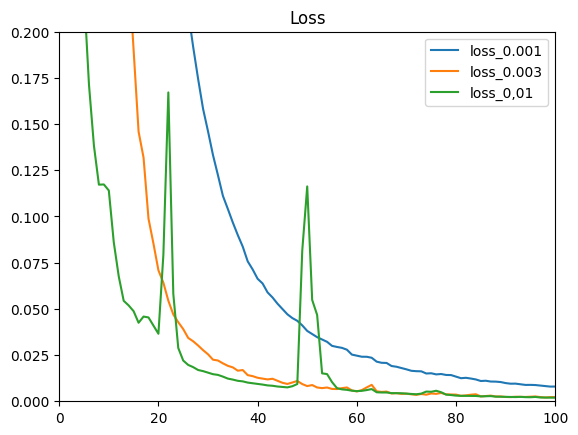

In [72]:
acc_A, loss_A   = hystory_lr_A.history["accuracy"], hystory_lr_A.history["loss"]
acc_B, loss_B   = hystory_lr_B.history["accuracy"],hystory_lr_B.history["loss"]
acc_C, loss_C   = hystory_lr_C.history["accuracy"],hystory_lr_C.history["loss"]
plt.figure(figsize=(6,6))
plt.title("Accuracy")
plt.plot(acc_A, label="acc_0.001")
plt.plot(acc_B, label="acc_0.003")
plt.plot(acc_C, label="acc_0.01")
plt.ylim(0.8,1.1)
plt.xlim((0,100))
plt.legend()
plt.show()
plt.title("Loss")
plt.plot(loss_A, label="loss_0.001")
plt.plot(loss_B, label="loss_0.003")
plt.plot(loss_C, label="loss_0,01")
plt.ylim(0,.2)
plt.xlim((0,100))
plt.legend()

plt.show()

bets is 0.03

In [44]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
     1. https://cs231n.github.io/neural-networks-case-study/
     2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlGn)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
